# The Riddler, 2016-04-01

statement from the [riddler](http://fivethirtyeight.com/features/can-you-solve-the-impossible-puzzle/):

> Three very skilled logicians are sitting around a table — Barack, Pete and Susan. Barack says: “I’m thinking of two natural numbers between 1 and 9, inclusive. I’ve written the product of these two numbers on this paper that I’m giving to you, Pete. I’ve written the sum of the two numbers on this paper that I’m giving to you, Susan. Now Pete, looking at your paper, do you know which numbers I’m thinking of?”
> 
> Pete looks at his paper and says: “No, I don’t.”
> 
> Barack turns to Susan and asks: “Susan, do you know which numbers I’m thinking of?” Susan looks at her paper and says: “No.”
> 
> Barack turns back to Pete and asks: “How about now? Do you know?”
> 
> “No, I still don’t,” Pete says.
> 
> Barack keeps going back and forth, and when he asks Pete for the fifth time, Pete says: “Yes, now I know!”
> 
> First, what are the two numbers? Second, if Pete had said no the fifth time, would Susan have said yes or no at her fifth turn?

In [118]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import scipy as sp

In [219]:
class Tracker(object):
    def __init__(self, low, high, func):
        self.low = low
        self.high = high
        self.poss = collections.defaultdict(set)
        for i in range(low, high + 1):
            for j in range(i, high + 1):
                self.poss[func(i, j)].add((i, j))
                
    def poss_as_array(self):
        L = self.high - self.low + 1
        z = sp.zeros((L, L)) - 1
        for (k, ijPairSet) in self.poss.items():
            for (i, j) in ijPairSet:
                z[i - self.low, j - self.low] = k
                z[j - self.low, i - self.low] = k
        return z
    
    def print_poss(self, ax):
        z = self.poss_as_array()
        ax.matshow(z)
        labs = [''] + ['{}'.format(i) for i in range(self.low, self.high + 1) if i % 2]
        ax.set_xticklabels(labs)
        ax.set_yticklabels(labs)
    
    def believe_me_i_would_know(self):
        """return all the pairs of numbers which are the only pairs to yield a given value"""
        return [el for (k, v) in self.poss.items() if len(v) == 1 for el in v]
    
    def well_if_you_dont_know_then(self, nopeSet):
        """we received outside information that it was not some pair"""
        newposs = {}
        for (k, v) in self.poss.items():
            newvals = {el for el in v if el not in nopeSet}
            if newvals:
                newposs[k] = newvals
        self.poss = newposs

    def dont_know(self):
        """any pair which would be the only one to result in the poss they result in can be excluded"""
        notThose = self.believe_me_i_would_know()
        toDrop = [k for (k, v) in self.poss.items() if len(v) == 1]
        for k in toDrop:
            del self.poss[k]
        return notThose
    
    def i_know(self):
        return self.believe_me_i_would_know()

In [220]:
def update(says, tells, know):
    if know:
        return says.i_know()
    else:
        tells.well_if_you_dont_know_then(says.dont_know())
        
        
def show_poss(s, p):
    f = plt.figure()
    a1 = f.add_subplot(1, 2, 1)
    s.print_poss(a1)
    a2 = f.add_subplot(1, 2, 2)
    p.print_poss(a2)
    return f

In [224]:
s = Tracker(1, 9, lambda x, y: x + y)
p = Tracker(1, 9, lambda x, y: x * y)

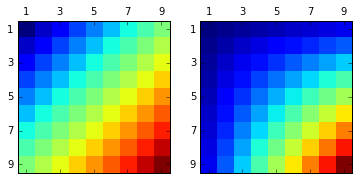

In [225]:
show_poss(s, p);

In [226]:
update(says=p, tells=s, know=False)

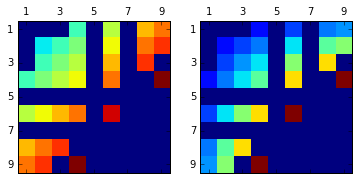

In [227]:
show_poss(s, p);

In [228]:
update(says=s, tells=p, know=False)

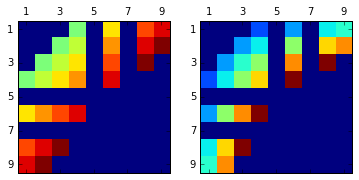

In [229]:
show_poss(s, p);

In [230]:
update(says=p, tells=s, know=False)

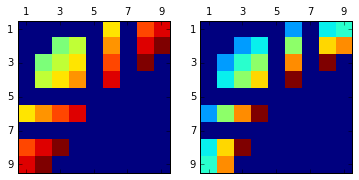

In [231]:
show_poss(s, p);

In [232]:
update(says=s, tells=p, know=False)

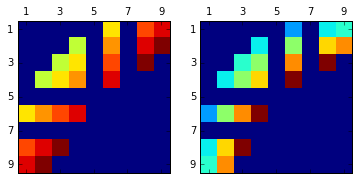

In [233]:
show_poss(s, p);

In [234]:
update(says=p, tells=s, know=False)

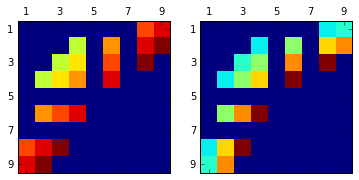

In [235]:
show_poss(s, p);

In [236]:
update(says=s, tells=p, know=False)

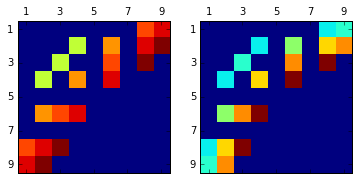

In [237]:
show_poss(s, p);

In [238]:
update(says=p, tells=s, know=False)

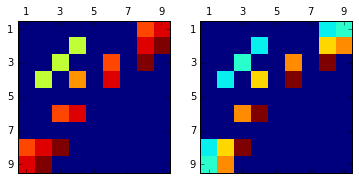

In [239]:
show_poss(s, p);

In [240]:
update(says=s, tells=p, know=False)

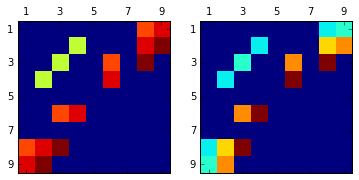

In [241]:
show_poss(s, p);

In [242]:
update(says=p, tells=s, know=True)

[(2, 8)]

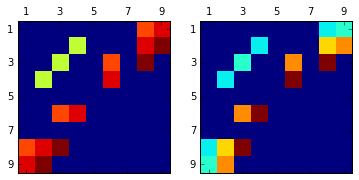

In [243]:
show_poss(s, p);